In [2]:
## Important library

import pandas as pd
import numpy as np


In [3]:
## Read data
df = pd.read_csv("e-trade-data.csv")
df.head()

,date,name,costumer_type,costumer_gender,situation,product,amount,sum_payment
0,28-06-2022,ONUR KARADAĞ,person,male,approved,3900 Serisi Dijital Baskı Folyosu Mat - Şeffaf...,1.0,1287.86
1,27-06-2022,MUHYETTİN TARTAR,person,male,approved,Işıksız Dökme Vinil (400gr.) Mat - 110cm * 50m,1.0,1311.04
2,27-06-2022,UĞUR GÜDER,person,male,approved,Unifol 3700 Kesim Folyosu 3710 - Parlak Siyah,5.0,237.09
3,27-06-2022,UĞUR GÜDER,person,male,approved,Unifol 3700 Kesim Folyosu 3746 - Parlak Parlem...,5.0,237.09
4,27-06-2022,UĞUR GÜDER,person,male,approved,Unifol 3700 Kesim Folyosu 3722 - Parlak Koyu Sarı,5.0,237.09


In [4]:
## Get quick information about df 
df.info()

""" 
we dont have missing value (thats nice)
Columns:
date, name, costumer_type, costumer_gender, situation, product, sum_payment
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1333 non-null   object 
 1   name             1333 non-null   object 
 2   costumer_type    1333 non-null   object 
 3   costumer_gender  1333 non-null   object 
 4   situation        1333 non-null   object 
 5   product          1333 non-null   object 
 6   amount           1333 non-null   float64
 7   sum_payment      1333 non-null   float64
dtypes: float64(2), object(6)
memory usage: 83.4+ KB


' \nwe dont have missing value (thats nice)\nColumns:\ndate, name, costumer_type, costumer_gender, situation, product, sum_payment\n'

In [5]:
## Show stats table about df
df.describe(include="all")

,date,name,costumer_type,costumer_gender,situation,product,amount,sum_payment
count,1333,1333,1333,1333,1333,1333,1333.000000,1333.000000
unique,405,288,2,2,3,487,NaN,NaN
top,17-05-2021,UĞUR GÜDER,person,male,approved,3900 Serisi Dijital Baskı Folyosu Parlak - Bey...,NaN,NaN
freq,16,115,1223,1194,1313,70,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.078020,679.421268
std,NaN,NaN,NaN,NaN,NaN,NaN,5.165278,1741.183467
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,203.370000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,462.270000
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,846.580000


In [6]:
## Show correlation stat about df
df.corr()

C:\Users\mac\AppData\Local\Temp\ipykernel_5600\2016466685.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,amount,sum_payment
amount,1.000000,0.039767
sum_payment,0.039767,1.000000


In [7]:
## Turn on categorical variables  to numerical variables
# importing the libraries
import category_encoders as cat_encoder
  
# creating a copy of the original data frame to encode some categorical data
end_df = df[["costumer_type", "costumer_gender", "situation"]]
  
# creating an object BinaryEncoder
# this code calls all columns
# we can specify specific columns as well
encoder = cat_encoder.BinaryEncoder(cols = end_df.columns)
  
# fitting the columns to a data frame
df_category_encoder = encoder.fit_transform( end_df )
  
display(df_category_encoder)

,costumer_type_0,costumer_type_1,costumer_gender_0,costumer_gender_1,situation_0,situation_1
0,0,1,0,1,0,1
1,0,1,0,1,0,1
2,0,1,0,1,0,1
3,0,1,0,1,0,1
4,0,1,0,1,0,1
...,...,...,...,...,...,...
1328,1,0,0,1,0,1
1329,0,1,0,1,0,1
1330,0,1,0,1,0,1
1331,0,1,0,1,0,1


In [ ]:
"""The recipe for 
k-means is quite straightforward.

Decide how many clusters you want, i.e. choose k
Randomly assign a centroid to each of the k clusters
Calculate the distance of all observation to each of the k centroids
Assign observations to the closest centroid
Find the new location of the centroid by taking the mean of all the observations in each cluster
Repeat steps 3-5 until the centroids do not change position"""

In [9]:
situation_num_df = df_category_encoder["situation_0"] + df_category_encoder["situation_1"]
situation_num_df.unique()

# 1: approved
# 2: canceled

array([1, 2], dtype=int64)

In [27]:
k_mean_df = pd.concat([df[["amount", "sum_payment"]], situation_num_df], axis=1)
k_mean_df.rename(columns = {'amount':'amount', 'sum_payment': 'sum_payment', 0: 'situation (cluster)'}, inplace = True)
k_mean_df.head()

# new dataframe for clustring

,amount,sum_payment,situation (cluster)
0,1.0,1287.86,1
1,1.0,1311.04,1
2,5.0,237.09,1
3,5.0,237.09,1
4,5.0,237.09,1


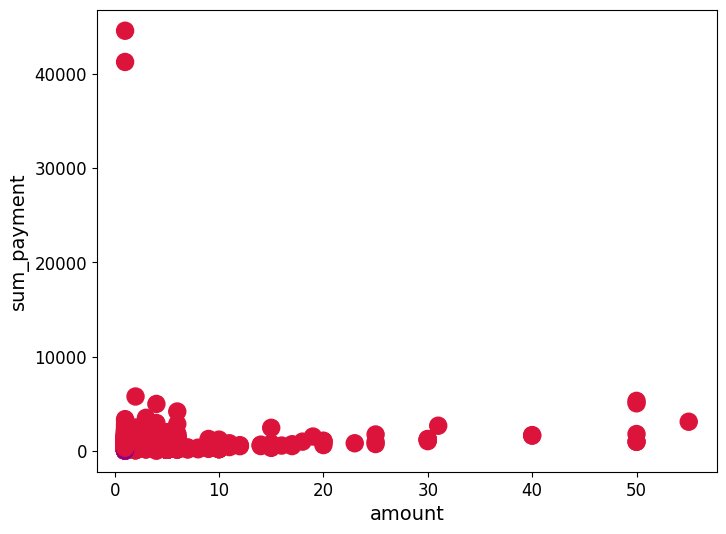

In [29]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=k_mean_df['amount'], y=k_mean_df['sum_payment'], s=150,
            c=k_mean_df['situation (cluster)'].astype('category'), 
            cmap = customcmap)
ax.set_xlabel(r'amount', fontsize=14)
ax.set_ylabel(r'sum_payment', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [30]:
def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3
df = k_mean_df[['amount','sum_payment']]
centroids = initiate_centroids(k, df)
centroids

,amount,sum_payment
898,1.0,47.41
1062,1.0,671.45
1251,1.0,342.00


In [31]:
def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors. 
    a and b are numpy arrays
    '''
    return np.square(np.sum((a-b)**2)) 

In [32]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 5149317800519.97
Error for centroid 1: 606126902256.62
Error for centroid 2: 2156372539541.38


In [33]:
def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid. 
    - dset - pandas dataframe with observations
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

In [34]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

,amount,sum_payment,centroid,error
0,1.0,1287.86,1,1.443706e+11
1,1.0,1311.04,1,1.673427e+11
2,5.0,237.09,2,1.214869e+08
3,5.0,237.09,2,1.214869e+08
4,5.0,237.09,2,1.214869e+08


In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'Amount', fontsize=14)
ax.set_ylabel(r'Sum_payment', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()